In [142]:
import pandas as pd
import numpy as np
import seaborn as sns

from collections import defaultdict

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.feature_selection import SequentialFeatureSelector

from mlxtend.feature_selection import SequentialFeatureSelector as SFS


from statsmodels.stats.outliers_influence import variance_inflation_factor 


from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

from statsmodels.regression.linear_model import OLS
from sklearn.metrics import make_scorer

#from custom_scorer_module import custom_scoring_function

from sklearn.model_selection import ShuffleSplit,cross_val_score
from stepwise_regression import step_reg
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, Lasso, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.style.use('ggplot')

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

import warnings
warnings.filterwarnings("ignore")

In [206]:
df_train = pd.read_csv('7406train.csv', header=None)
col_dict=defaultdict()
for item in df_train.columns:
    col_dict[item]='col_'+ str(item)
df_train

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,201
0,0.00,0.00,14.063579,21.082123,12.992643,10.154928,12.817867,52.655972,16.337817,23.191534,...,46.663096,16.637476,31.356967,15.194169,11.371479,12.681528,28.779674,26.693366,29.687207,25.947949
1,0.00,0.01,31.739201,11.173196,12.339920,61.565603,24.540478,19.567963,10.361631,21.469419,...,20.314870,17.912426,20.943154,20.241337,14.002437,19.213766,42.269653,18.762048,17.165399,9.066624
2,0.00,0.02,14.615998,19.892816,13.872612,20.196217,24.010112,17.027382,16.154610,16.103595,...,17.841418,26.119396,18.884598,15.925749,14.798067,15.217862,10.611148,11.695364,8.771664,17.765064
3,0.00,0.03,10.857759,10.859013,17.228320,41.176834,12.082179,13.499356,23.982232,13.807374,...,12.908245,53.329340,17.939097,59.636709,7.645945,9.644091,22.337745,31.999950,16.571976,20.740766
4,0.00,0.04,21.467285,18.571400,10.624715,30.268410,16.656842,18.797707,10.653434,22.814054,...,10.825614,20.363934,21.363700,18.395306,17.778682,11.232521,18.560414,25.251054,28.931830,14.606190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.99,0.95,67.696477,62.669471,59.093471,54.683607,72.114475,81.465554,50.309119,65.182860,...,57.353912,62.820095,71.315168,71.960717,70.883221,45.778002,59.456879,58.116272,66.957658,76.262732
9996,0.99,0.96,57.374739,66.897261,62.655812,62.004188,70.234985,69.308978,75.092123,62.608017,...,65.079807,66.128588,59.761602,57.660125,44.828161,62.884349,50.863227,70.406568,57.976059,49.179771
9997,0.99,0.97,49.900371,69.655773,57.646385,55.405063,72.423901,58.930084,38.426946,65.737290,...,63.724477,64.436966,60.905358,59.589382,51.300082,65.411723,64.928145,64.466348,63.508603,62.505428
9998,0.99,0.98,51.529862,54.995091,52.393421,58.872693,60.446550,74.440817,66.179499,60.213038,...,58.608725,64.325612,56.801916,71.016431,54.646326,63.126287,62.826411,66.008724,61.964206,60.881122


In [207]:
df_trial = df_train.iloc[0:3:,2:6]#df_train.head(2)
df_trial['mean']=np.mean(df_trial.iloc[:,0:4], axis=1)
df_trial

,2,3,4,5,mean
0,14.063579,21.082123,12.992643,10.154928,14.573318
1,31.739201,11.173196,12.339920,61.565603,29.204480
2,14.615998,19.892816,13.872612,20.196217,17.144411


In [208]:
df_train.rename(columns=col_dict, inplace=True)
df_train.rename(columns={'col_0':'x1','col_1':'x2'}, inplace=True)
df_train_1=df_train[['x1','x2']]
df_train_1['mean_cols']=np.mean(df_train.iloc[:,2:202], axis=1)
df_train_1['var_cols']=np.var(df_train.iloc[:,2:202], axis=1)
final_df_mean=df_train_1[['x1','x2','mean_cols']]
final_df_var=df_train_1[['x1','x2','var_cols']]
final_df_mean

,x1,x2,mean_cols
0,0.00,0.00,21.368195
1,0.00,0.01,19.006440
2,0.00,0.02,20.258861
3,0.00,0.03,21.553905
4,0.00,0.04,20.659588
...,...,...,...
9995,0.99,0.95,60.938533
9996,0.99,0.96,61.575708
9997,0.99,0.97,61.362636
9998,0.99,0.98,62.292096


In [210]:
final_df_var.describe()

,x1,x2,var_cols
count,10000.000000,10000.000000,10000.000000
mean,0.495000,0.495000,234.106615
std,0.288675,0.288675,88.053801
min,0.000000,0.000000,1.561085
25%,0.247500,0.247500,171.775578
50%,0.495000,0.495000,258.954178
75%,0.742500,0.742500,304.640957
max,0.990000,0.990000,416.488101


In [221]:
X=final_df_var[['x1','x2']]
X_graphical=X[(X['x1'] ==.70)]['x2']
y=final_df_var[['var_cols']]
y_graphical=y[ (X['x1'] ==.70)]

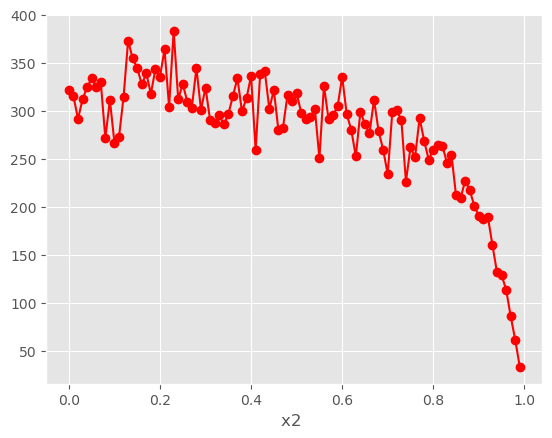

In [202]:
fig, ax = plt.subplots()

ax.plot(X_graphical, y_graphical, 'or-')
#ax.set_xscale('log')
ax.set_xlabel('x2 ')
# ax.set_xlim(x1[0], x1[-1]) # optionally set tighter xlims
#ax.xaxis.set_minor_formatter(ticker.ScalarFormatter()) # this shows the minor tick labels

#ax2 = ax.twiny()
#ax2.set_xlabel('x2')
#ax2.set_xlim(ax.get_xlim()) # exactly the same limits for both axes
#ax2.set_xscale('log')
#ax2.set_xticks(x1) # set the tick positions via x1, but the labels via x2
#ax2.set_xticklabels(x2)
#ax2.xaxis.set_minor_locator(ticker.NullLocator()) # remove the old minor ticks
#ax2.grid(True, axis='x', ls=':')

#plt.tight_layout()
plt.show()

In [13]:
from generalized_additive_models import GAM, Spline, Categorical

In [153]:
terms = Spline("x1") + Spline("x2") 
gam = GAM(terms)

In [154]:
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
scores_gam=cross_val_score(gam,X,y,cv=shuffle_split, scoring="r2")
print("cross Validation scores:n {}".format(scores_gam))
print("Average Cross Validation score :{}".format(scores_gam.mean()))
print("Variance of Cross Validation score :{}".format(scores_gam.var()))

cross Validation scores:n [0.909651   0.91143032 0.91001751 0.91074175 0.90905414 0.90859196
 0.9091076  0.90683832 0.91078743 0.91075291 0.90674231 0.90737125
 0.9108821  0.90872419 0.90677758 0.91317428 0.91061885 0.9069627
 0.91134047 0.9085267  0.90918672 0.90973455 0.91177256 0.91238838
 0.90561045 0.90560555 0.91016646 0.90627283 0.90738949 0.90770691
 0.91016258 0.91081805 0.91092195 0.90934092 0.90660159 0.90875713
 0.90934565 0.91211956 0.91347305 0.91088795 0.90707637 0.90560251
 0.90911684 0.90227566 0.90711643 0.90835987 0.90883454 0.90835638
 0.91271388 0.90821137 0.91092711 0.90768573 0.9102496  0.91017568
 0.90842232 0.91037549 0.90775961 0.91059123 0.9097705  0.91135702
 0.90818986 0.91008725 0.91052607 0.90968176 0.90911426 0.91075447
 0.90698452 0.90768806 0.90754357 0.9105079  0.90943611 0.91082952
 0.91213939 0.9086942  0.90312613 0.90989485 0.91142995 0.90328459
 0.9111959  0.91002751 0.90863209 0.90682432 0.90561639 0.90439929
 0.90883506 0.90862872 0.91053513 0.9

In [155]:
model = gam
model.fit(X,y)
final_df_var['y__mean_new_gam']=model.predict(X)
#print(np.sum((final_df_mean['y__mean_new_gam']-final_df_mean['mean_cols'])**2)/10000)
print(mean_squared_error(final_df_var['y__mean_new_gam'],final_df_var['var_cols']))

700.4353211052874


In [ ]:
# GAM - Var --> 700
# GBR - Var --> 517.07
# XGB - Mean --> 521.975
# KNN - Mean --> 515.308
# NN - Mean --> 546
# SVR - Mean --> 931
# Random Forest - Var --> 465.19
# AdaBoost - Mean --> 711.99
# PC : 2214

In [17]:
gbm_model = GradientBoostingRegressor(random_state=77)

In [18]:
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
gbm_params = {"learning_rate": [0.001, 0.01,.1,1], 
              "max_depth": [3,5,8], 
              "n_estimators": [100,200,250,500], 
              "subsample": [1,0.5,0.8], 
              "loss": ["squared_error", "absolute_error","huber", "quantile"],
             'ccp_alpha':np.linspace(.001, .1,50),
             'criterion':['friedman_mse','squared_error']}

gbm_cv_model = RandomizedSearchCV(gbm_model, gbm_params, 
                            cv=10, verbose=1, n_iter = 50).fit(X, y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [19]:
#gbm_cv_model.fit(X, y)
gbm_cv_model.best_params_

{'subsample': 0.5,
 'n_estimators': 250,
 'max_depth': 3,
 'loss': 'squared_error',
 'learning_rate': 0.1,
 'ccp_alpha': 0.07979591836734694}

In [156]:
model_gbr = GradientBoostingRegressor(subsample= 0.5,
 n_estimators= 250,
 max_depth= 3,
 loss= 'squared_error',
 learning_rate= 0.1,
 ccp_alpha= 0.07979591836734694,
                             random_state=77)
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
scores_gbr=cross_val_score(model_gbr,X,y,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores_gbr))
print("Average Cross Validation score :{}".format(scores_gbr.mean()))
print("Variance of Cross Validation score :{}".format(scores_gbr.var()))

cross Validation scores:n [0.92990631 0.92926849 0.92810349 0.93003499 0.93013012 0.92731479
 0.92884073 0.92436731 0.92997099 0.92964208 0.92524808 0.92968741
 0.92903191 0.92733214 0.92673385 0.92984195 0.92880551 0.92694954
 0.92970927 0.92730306 0.92601993 0.92967997 0.92910467 0.92972024
 0.92395994 0.92387286 0.92821219 0.92425816 0.923226   0.92487938
 0.92692427 0.9300498  0.9271789  0.93215688 0.9273535  0.92747031
 0.92784536 0.92967919 0.93054143 0.92979161 0.92709953 0.92632071
 0.92814308 0.92264633 0.92496827 0.92764356 0.92958787 0.92764783
 0.92848735 0.9276148  0.92769612 0.92652572 0.92815027 0.92696226
 0.92698351 0.92807565 0.92919803 0.92679577 0.93063957 0.9327067
 0.92872123 0.92609448 0.92855368 0.92790394 0.92655828 0.92971608
 0.92658632 0.92600677 0.92668319 0.93154697 0.92792029 0.93135278
 0.92940511 0.92773007 0.92343207 0.92927934 0.92970239 0.92273175
 0.93018517 0.92805424 0.9278454  0.92796628 0.92589852 0.92685728
 0.92936282 0.92857708 0.92875073 0.9

In [157]:
model = model_gbr
model.fit(X,y)
final_df_var['y__mean_new_gbr']=model.predict(X)
#print(np.sum((final_df_mean['y__mean_new_gam']-final_df_mean['mean_cols'])**2)/10000)
print(mean_squared_error(final_df_var['y__mean_new_gbr'],final_df_var['var_cols']))

517.0762605181981


In [22]:
import xgboost
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=77)

In [23]:
xgb_params = {"learning_rate": np.linspace(.001, .1,50),
"max_depth": [2,3,4,5,8],
"n_estimators": [100,200,500,1000, 250],
"colsample_bytree": [0.4,0.7,1]}

In [24]:
xgb_cv_model = RandomizedSearchCV(xgb_model, xgb_params, 
                            cv=10, verbose=1, n_iter = 50).fit(X, y)
xgb_cv_model.best_params_

Fitting 10 folds for each of 50 candidates, totalling 500 fits


{'n_estimators': 250,
 'max_depth': 3,
 'learning_rate': 0.05757142857142858,
 'colsample_bytree': 1}

In [162]:
model_xgb = XGBRegressor(
 n_estimators= 250,
 max_depth= 3,
colsample_bytree=1,
 learning_rate= 0.05757142857142858,

                             random_state=77)
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
scores_xgb=cross_val_score(model_xgb,X,y,cv=shuffle_split,scoring='r2')
print("cross Validation scores:n {}".format(scores_xgb))
print("Average Cross Validation score :{}".format(scores_xgb.mean()))
print("Variance of Cross Validation score :{}".format(scores_xgb.var()))

cross Validation scores:n [0.92980506 0.92996243 0.92877174 0.9311136  0.93098238 0.92803424
 0.92980165 0.92492248 0.93070042 0.93064116 0.92600273 0.93004238
 0.92948419 0.92782478 0.92738693 0.93041925 0.92924635 0.92755961
 0.93059025 0.92726262 0.9267078  0.92995803 0.92997661 0.93065038
 0.92494312 0.92463719 0.92829973 0.92464047 0.92466807 0.92573619
 0.92836071 0.93060076 0.92811691 0.93257416 0.92746182 0.92861697
 0.92864876 0.92973025 0.9313874  0.93004965 0.92784906 0.92718001
 0.92834448 0.92380561 0.92564021 0.92829756 0.93089534 0.92789261
 0.92959217 0.92820747 0.92822833 0.92726834 0.92871484 0.92703661
 0.92783953 0.92859839 0.92936896 0.92825452 0.93120699 0.93288634
 0.92913043 0.92677981 0.92855373 0.9292736  0.92701602 0.93071341
 0.92768762 0.92690085 0.92780907 0.93249127 0.92871298 0.93220924
 0.92998384 0.92860303 0.92424873 0.93025883 0.93073089 0.92377737
 0.93058256 0.92911497 0.9282514  0.92854734 0.92628749 0.92774105
 0.93024536 0.92920975 0.92972371 0.

In [163]:
model = model_xgb
model.fit(X,y)
final_df_var['y__mean_new_xgb']=model.predict(X)
#print(np.sum((final_df_mean['y__mean_new_gam']-final_df_mean['mean_cols'])**2)/10000)
print(mean_squared_error(final_df_var['y__mean_new_xgb'],final_df_var['var_cols']))

521.9751444912041


In [27]:
from sklearn.neighbors import KNeighborsRegressor

knn_params = {"n_neighbors": np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = RandomizedSearchCV(knn, knn_params, cv=10, random_state=123,verbose=1, n_iter = 50).fit(X, y)
knn_cv_model.best_params_

Fitting 10 folds for each of 29 candidates, totalling 290 fits


{'n_neighbors': 16}

In [160]:
model_knn = KNeighborsRegressor(n_neighbors=16)
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
scores_knn=cross_val_score(model_knn,X,y,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores_knn))
print("Average Cross Validation score :{}".format(scores_knn.mean()))
print("Variance of Cross Validation score :{}".format(scores_knn.var()))

cross Validation scores:n [0.92557221 0.92548323 0.92460569 0.92594589 0.92701667 0.92418288
 0.92595368 0.92234744 0.92808073 0.92698364 0.92257619 0.9255873
 0.92544235 0.92457066 0.92307852 0.92608836 0.92503533 0.92350234
 0.92554868 0.92272994 0.92296791 0.92523186 0.92547315 0.92627509
 0.9195177  0.92080242 0.92380176 0.92097419 0.92205266 0.92248634
 0.92410099 0.92571979 0.9224879  0.92829584 0.92395549 0.9248204
 0.9229887  0.92464354 0.92831961 0.92633203 0.92373404 0.92357046
 0.92405535 0.92034781 0.92289247 0.92470054 0.92583339 0.92308695
 0.9256554  0.92352766 0.92563782 0.9236316  0.92385103 0.92338732
 0.92501561 0.92399492 0.92565034 0.92389469 0.92791244 0.92869786
 0.92488439 0.92411885 0.92537862 0.92553253 0.92245913 0.92639864
 0.92366475 0.92229156 0.92283686 0.92951405 0.92405119 0.92780335
 0.92553138 0.92427829 0.91986008 0.92622308 0.9265421  0.91919211
 0.92631093 0.92458274 0.92385817 0.92484955 0.92319775 0.92404856
 0.92630692 0.92408889 0.9254015  0.91

In [161]:
model = model_knn
model.fit(X,y)
final_df_var['y__mean_new_knn']=model.predict(X)
#print(np.sum((final_df_mean['y__mean_new_gam']-final_df_mean['mean_cols'])**2)/10000)
print(mean_squared_error(final_df_var['y__mean_new_knn'],final_df_var['var_cols']))

515.3087379659106


In [30]:
from sklearn.ensemble import RandomForestRegressor
dt_grid = {
                 'n_estimators' : [10,100,200,250,300,400,500],
                 'criterion': ['squared_error','absolute_error','poisson','friedman_mse'],
                 'max_depth': [10,50,75,100,120,150,200, None],
                 'min_samples_split': [5,10,20,50,2,100],
                
                 
                'ccp_alpha':np.linspace(.001, .1,50)
                 
                 }

rf = RandomForestRegressor(random_state=77)
r_rf = RandomizedSearchCV(param_distributions=dt_grid, 
                                    estimator = rf, scoring = "r2", 
                                    verbose = 1, n_iter = 50, cv = 10, random_state=77)

In [31]:
r_rf.fit(X, y)
r_rf.best_params_

Fitting 10 folds for each of 50 candidates, totalling 500 fits


{'n_estimators': 250,
 'min_samples_split': 20,
 'max_depth': 10,
 'criterion': 'squared_error',
 'ccp_alpha': 0.06161224489795919}

In [166]:
model_rf = RandomForestRegressor(n_estimators= 250,
 min_samples_split= 20,
 max_depth= 10,
 criterion= 'squared_error',
 ccp_alpha= 0.06161224489795919,
                             random_state=77)
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
scores_rf=cross_val_score(model_rf,X,y,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores_rf))
print("Average Cross Validation score :{}".format(scores_rf.mean()))
print("Variance of Cross Validation score :{}".format(scores_rf.var()))

cross Validation scores:n [0.92802309 0.92816588 0.92756053 0.92899723 0.92907522 0.92667953
 0.92833785 0.92334284 0.93025942 0.92984675 0.92425475 0.92815728
 0.9279636  0.92603782 0.92489979 0.92915124 0.92802301 0.92563532
 0.92777675 0.92576149 0.92504667 0.9284725  0.92854029 0.92891048
 0.92270754 0.92340809 0.92662631 0.92292838 0.9236706  0.92403836
 0.92626586 0.92914244 0.92650742 0.93111953 0.92687468 0.92686251
 0.92708882 0.92789991 0.93004924 0.92833581 0.92620472 0.92581771
 0.92732845 0.92274394 0.92510943 0.92619154 0.92899119 0.92665698
 0.92718216 0.92603515 0.92621532 0.92613849 0.92655972 0.92662901
 0.92631368 0.92658353 0.92808821 0.9266511  0.92985372 0.93167434
 0.92811994 0.92503962 0.92785084 0.9271091  0.92560785 0.9284931
 0.92557816 0.9247733  0.926017   0.93065306 0.92768278 0.93005345
 0.92904256 0.92663796 0.92311697 0.92825975 0.92858759 0.92064539
 0.92960112 0.92818566 0.92659295 0.92744341 0.92527321 0.92642834
 0.92924955 0.92716854 0.9283386  0.9

In [165]:
model = model_rf
model.fit(X,y)
final_df_var['y__mean_new_rf']=model.predict(X)
#print(np.sum((final_df_mean['y__mean_new_gam']-final_df_mean['mean_cols'])**2)/10000)
print(mean_squared_error(final_df_var['y__mean_new_rf'],final_df_var['var_cols']))

465.1930212478025


In [41]:
from sklearn.svm import SVR
dt_grid = {
                 'kernel' : ['linear','poly','rbf','sigmoid'],
                 'degree': [2,3,4,5],
                 'gamma': ['scale','auto',.001,.01,.1,1,.02,.05],
                 'C': [5,10,15,20,25,50,100,150],
    'epsilon':np.linspace(.001, .1,50)
    
                 
                 }

svr = SVR()
r_svr = RandomizedSearchCV(param_distributions=dt_grid, 
                                    estimator = svr, scoring = "r2", 
                                    verbose = 1, n_iter = 25, cv = 10, random_state=77)

In [42]:
r_svr.fit(X, y)
r_svr.best_params_

Fitting 10 folds for each of 25 candidates, totalling 250 fits


{'kernel': 'rbf',
 'gamma': 1,
 'epsilon': 0.015142857142857145,
 'degree': 4,
 'C': 5}

In [167]:
model_svr = SVR(kernel= 'rbf',
 gamma= 1,
 degree= 4,
 C= 5,
           epsilon= 0.015142857142857145)
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
scores_svr=cross_val_score(model_svr,X,y,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores_svr))
print("Average Cross Validation score :{}".format(scores_svr.mean()))
print("Variance of Cross Validation score :{}".format(scores_svr.var()))

cross Validation scores:n [0.88298392 0.87442691 0.87269448 0.87012215 0.87329079 0.87484383
 0.87218477 0.87730179 0.88299419 0.87567453 0.87075783 0.87984412
 0.87228665 0.87243661 0.87627188 0.87863605 0.8729862  0.87252638
 0.8778982  0.87577291 0.87205694 0.87496051 0.87529895 0.86737094
 0.86663415 0.86788649 0.87037179 0.87123817 0.87689222 0.87037682
 0.87460439 0.86892349 0.86585291 0.8746942  0.87113596 0.86790276
 0.87115688 0.87870507 0.87731175 0.87592626 0.87395802 0.87544101
 0.87179181 0.86359986 0.87502995 0.87825581 0.88113846 0.87251776
 0.87140968 0.87265664 0.87859023 0.87182043 0.87057044 0.8726317
 0.877862   0.87483012 0.87547353 0.87215024 0.88387442 0.87746335
 0.87296557 0.87747066 0.87742929 0.8720397  0.8653528  0.87500798
 0.87644406 0.87500254 0.87491933 0.8806834  0.8758632  0.88066479
 0.87157626 0.87950372 0.86643473 0.87998212 0.8782742  0.87618148
 0.87197348 0.87444707 0.87290545 0.87223824 0.87357936 0.87754
 0.8742546  0.87527059 0.87533429 0.8721

In [168]:
model = model_svr
model.fit(X,y)
final_df_var['y__mean_new_svr']=model.predict(X)
#print(np.sum((final_df_mean['y__mean_new_gam']-final_df_mean['mean_cols'])**2)/10000)
print(mean_squared_error(final_df_var['y__mean_new_svr'],final_df_var['var_cols']))

931.7188597387712


In [274]:
#final_df_mean.head(200)

In [34]:
from sklearn.ensemble import AdaBoostRegressor
adab_model=AdaBoostRegressor(random_state=77)

adab_params = {"learning_rate": np.linspace(0,10,1000),
"loss": ['linear','square','exponential'],
"n_estimators": [100,200,500,1000, 250]
}


adab_cv_model = RandomizedSearchCV(adab_model, adab_params, 
                            cv=10, verbose=1, n_iter = 50, random_state=77).fit(X, y)
adab_cv_model.best_params_

Fitting 10 folds for each of 50 candidates, totalling 500 fits


{'n_estimators': 250, 'loss': 'linear', 'learning_rate': 0.970970970970971}

In [169]:
model_ada = AdaBoostRegressor(random_state=77,n_estimators=250,loss='linear',learning_rate=0.970970970970971)
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
scores_adab=cross_val_score(model_ada,X,y,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores_adab))
print("Average Cross Validation score :{}".format(scores_adab.mean()))
print("Variance of Cross Validation score :{}".format(scores_adab.var()))

cross Validation scores:n [0.90712305 0.90927194 0.90935489 0.90522923 0.90855806 0.90718576
 0.90636913 0.90505975 0.90530689 0.90607279 0.90722519 0.9034034
 0.90663297 0.90221172 0.90626867 0.90816695 0.89458057 0.90660597
 0.90657165 0.90306335 0.9045134  0.90581146 0.90664454 0.90344109
 0.90404838 0.90591631 0.90619305 0.90161201 0.90407401 0.90689171
 0.90612368 0.90729531 0.90657422 0.90611593 0.90119717 0.91093775
 0.90515596 0.90617653 0.91200208 0.89850176 0.90449132 0.90853536
 0.90525571 0.90175915 0.90372742 0.90806898 0.90426392 0.90226189
 0.91025761 0.90286131 0.89738931 0.90473935 0.90741275 0.90804362
 0.90648035 0.90379811 0.9059615  0.90524615 0.90680511 0.91183388
 0.90737039 0.90275844 0.90595875 0.9051225  0.90245194 0.90225273
 0.89997379 0.90967135 0.90201472 0.90726985 0.90356672 0.90964464
 0.90428216 0.90859523 0.89928732 0.90265481 0.90766066 0.89318755
 0.90478551 0.90738679 0.90071673 0.90646968 0.89735303 0.90648777
 0.90089823 0.90621351 0.90885778 0.8

In [170]:
model = model_ada
model.fit(X,y)
final_df_var['y__mean_new_ada']=model.predict(X)
#print(np.sum((final_df_mean['y__mean_new_gam']-final_df_mean['mean_cols'])**2)/10000)
print(mean_squared_error(final_df_var['y__mean_new_ada'],final_df_var['var_cols']))

711.9918225008751


In [176]:
model = model_ada
r2_score(y, model.predict(X))

0.9081620409450044

In [37]:
from sklearn.preprocessing import PolynomialFeatures



train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):

    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)

    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate Errors

    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))

    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later


    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

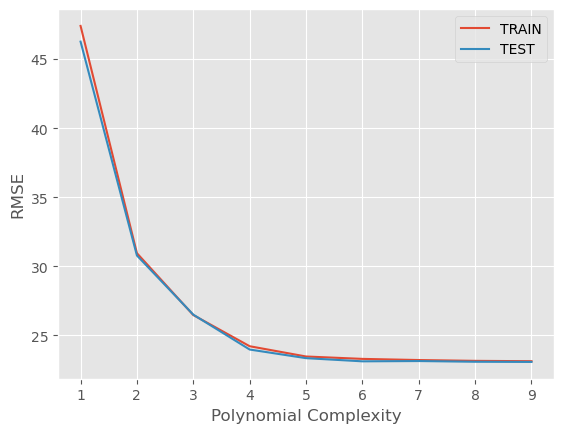

In [38]:
plt.plot(range(1,10),train_rmse_errors[:11],label='TRAIN')
plt.plot(range(1,10),test_rmse_errors[:11],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [171]:
polynomial_converter = PolynomialFeatures(degree=4,include_bias=False)

model_pc = LinearRegression(fit_intercept=True)
shuffle_split=ShuffleSplit(test_size=.3,n_splits=100,  random_state=123)
scores_pc=cross_val_score(model_pc,X,y,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores_pc))
print("Average Cross Validation score :{}".format(scores_pc.mean()))
print("Variance of Cross Validation score :{}".format(scores_pc.var()))

cross Validation scores:n [0.72221211 0.71606217 0.7157846  0.70459702 0.70997587 0.71083012
 0.71140309 0.71989808 0.72660057 0.72027829 0.71435514 0.72457302
 0.71090694 0.71625481 0.72150475 0.72370963 0.71536905 0.7159243
 0.71870087 0.70990859 0.7100678  0.71150356 0.70947698 0.70361214
 0.70476688 0.7078888  0.70514824 0.70716922 0.71253417 0.71188115
 0.71542436 0.70787094 0.69834426 0.71080945 0.70875791 0.7116034
 0.7090801  0.72432802 0.72029585 0.71592641 0.70984907 0.72367473
 0.71500699 0.70627935 0.72041029 0.72119606 0.72605872 0.70395604
 0.71236954 0.71046633 0.72481841 0.70738274 0.71461647 0.715421
 0.71271963 0.7128791  0.71892957 0.7089659  0.73299848 0.7262329
 0.71276412 0.71588932 0.72674568 0.7112837  0.70180969 0.71140342
 0.71372038 0.71379647 0.72067187 0.71918623 0.71899011 0.71977443
 0.71089877 0.72643946 0.70709476 0.7178804  0.72718978 0.71577126
 0.70685572 0.71337383 0.72164548 0.7154472  0.71192526 0.72918713
 0.71344996 0.72209149 0.71079973 0.70073

In [172]:
model = model_pc
model.fit(X,y)
final_df_var['y__mean_new_pc']=model.predict(X)
#print(np.sum((final_df_mean['y__mean_new_gam']-final_df_mean['mean_cols'])**2)/10000)
print(mean_squared_error(final_df_var['y__mean_new_pc'],final_df_var['var_cols']))

2214.6924856701235


In [46]:
final_df_var['new_var']=np.mean(final_df_var.loc[:,['y__mean_new_gbr','y__mean_new_xgb','y__mean_new_knn','y__mean_new_rf']],axis=1)
print(mean_squared_error(final_df_var['new_var'],final_df_var['var_cols']))

495.81315608084174


In [47]:
final_df_var.head(10)

,x1,x2,var_cols,y__mean_new_gam,y__mean_new_gbr,y__mean_new_xgb,y__mean_new_knn,y__mean_new_rf,y__mean_new_ada,y__mean_new_pc,y__mean_new_svr,new_var
0,0.0,0.00,129.393247,120.692441,107.159765,109.981720,102.042052,108.100740,127.751233,219.777370,143.649175,106.821069
1,0.0,0.01,81.048565,120.061312,93.603279,95.430550,100.486250,100.958230,127.751233,218.104918,142.972671,97.619577
2,0.0,0.02,78.213141,119.512446,95.249720,96.870499,100.637070,100.217642,127.751233,216.432466,142.286916,98.243733
3,0.0,0.03,131.763423,119.030881,103.598161,101.598511,102.000266,101.465706,127.751233,214.760015,141.591910,102.165661
4,0.0,0.04,92.790727,118.601656,103.567657,101.871605,100.227592,101.380680,127.751233,213.087563,140.887633,101.761884
5,0.0,0.05,117.406632,118.209811,104.351307,103.693367,107.040108,102.092118,127.751233,211.415111,140.174045,104.294225
6,0.0,0.06,92.800355,117.840402,102.982764,104.692863,108.714565,101.995256,127.751233,209.742660,139.451088,104.596362
7,0.0,0.07,117.468801,117.483866,104.778824,106.280708,109.770965,101.872546,127.751233,208.070208,138.718683,105.675761
8,0.0,0.08,67.744410,117.143456,102.958667,102.210510,106.418705,100.431755,127.751233,206.397756,137.976731,103.004909
9,0.0,0.09,97.438795,116.824297,99.390989,102.210510,105.634282,99.718246,127.751233,204.725305,137.225112,101.738507


In [95]:
#!pip install pyearth

In [59]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import Dataset


In [60]:
nInput  = 2
nHidden = 10
nOutput = 1

In [61]:
class MLPcondensed(nn.Module):
    '''
    Multi-layer perceptron for non-linear regression.
    '''
    def __init__(self, nInput, nHidden, nOutput):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(nInput, nHidden),
            nn.ReLU(),
            nn.Linear(nHidden, nHidden),
            nn.ReLU(),
            nn.Linear(nHidden, nHidden),
            nn.ReLU(),
            nn.Linear(nHidden, nOutput)
        )

    def forward(self, x):
        return(self.layers(x))

mlpCondensed = MLPcondensed(nInput, nHidden, nOutput)

In [62]:
class MLPexplicit(nn.Module):
    '''
    Multi-layer perceptron for non-linear regression.
    '''
    def __init__(self, nInput, nHidden, nOutput):
        super(MLPexplicit, self).__init__()
        self.nInput  = nInput
        self.nHidden = nHidden
        self.nOutput = nOutput
        self.linear1 = nn.Linear(self.nInput, self.nHidden)
        self.linear2 = nn.Linear(self.nHidden, self.nHidden)
        self.linear3 = nn.Linear(self.nHidden, self.nHidden)
        self.linear4 = nn.Linear(self.nHidden, self.nOutput)
        self.ReLU    = nn.ReLU()

    def forward(self, x):
        h1 = self.ReLU(self.linear1(x))
        h2 = self.ReLU(self.linear2(h1))
        h3 = self.ReLU(self.linear3(h2))
        output = self.linear4(h3)
        return(output)

mlpExplicit = MLPexplicit(nInput, nHidden, nOutput)

In [173]:
model_nn = mlpExplicit

X_tensor = torch.tensor(X.values.astype(float))
X_tensor=X_tensor.to(torch.float32)
y_tensor = torch.tensor(y.values.astype(float))
y_tensor=y_tensor.to(torch.float32)

In [64]:
class nonLinearRegressionData(Dataset):
    '''
    Custom 'Dataset' object for our regression data.
    Must implement these functions: __init__, __len__, and __getitem__.
    '''

    def __init__(self, X_tensor, y_tensor):
        self.X_tensor = torch.reshape(X_tensor, (len(X_tensor), 2))
        self.y_tensor = torch.reshape(y_tensor, (len(y_tensor), 1))

    def __len__(self):
        return(len(self.X_tensor))

    def __getitem__(self, idx):
        return(X_tensor[idx], y_tensor[idx])

# instantiate Dataset object for current training data
d = nonLinearRegressionData(X_tensor, y_tensor)

In [65]:
train_dataloader = DataLoader(d, batch_size=25 , shuffle=True)
train_dataloader

In [66]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model_nn.parameters(), lr=1e-4)
nTrainSteps = 50000

# Run the training loop
for epoch in range(0, nTrainSteps):

    # Set current loss value
    current_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, data in enumerate(train_dataloader, 0):
        
        #print(len(data[0]))
        #print(len(data[1]))
        # Get inputs
        inputs, targets = data
        # Zero the gradients
        optimizer.zero_grad()
        # Perform forward pass (make sure to supply the input in the right way)
        outputs = model_nn(torch.reshape(inputs, (len(inputs), 2))).squeeze()
        # Compute loss
        loss = loss_function(outputs, targets)
        # Perform backward pass
        loss.backward()
        # Perform optimization
        optimizer.step()
        # Print statistics
        current_loss += loss.item()

    if (epoch + 1) % 2500 == 0:
        print("Loss after epoch %5d: %.3f" % (epoch + 1, current_loss))
        current_loss = 0.0

# Process is complete.
print("Training process has finished.")




Loss after epoch  2500: 234341.693
Loss after epoch  5000: 230830.415
Loss after epoch  7500: 229985.957
Loss after epoch 10000: 229112.279
Loss after epoch 12500: 227467.845
Loss after epoch 15000: 221414.892
Loss after epoch 17500: 220725.671
Loss after epoch 20000: 218930.856
Loss after epoch 22500: 218885.367
Loss after epoch 25000: 218847.451
Loss after epoch 27500: 219099.674
Loss after epoch 30000: 218885.179
Loss after epoch 32500: 218673.002
Loss after epoch 35000: 218757.501
Loss after epoch 37500: 218895.136
Loss after epoch 40000: 218688.857
Loss after epoch 42500: 218705.487
Loss after epoch 45000: 218361.928
Loss after epoch 47500: 218505.651
Loss after epoch 50000: 218295.864
Training process has finished.


In [174]:
model_1=model_nn
yPred = np.array(
    [model.forward(o).detach().numpy() for o in X_tensor]
).flatten()

In [175]:
mean_squared_error(y,yPred)

546.4437821490015

In [82]:
from sklearn.metrics import r2_score
r2_score(y, yPred)

0.9295156487688518

In [ ]:
# GAM - Mean --> 3.17 / 3.17
# GBR - Mean --> 1.22 / 1.05
# XGB - Mean --> 1.16 / 1.09
# KNN - Mean --> 1.06 / 1.08
# NN - Mean --> 1.34
# SVR - Mean --> 1.21 / 1.383
# Random Forest - Mean --> 1.105 / 1.105
# AdaBoost - Mean --> 3.83 / 2.05
# PC : 9.3

In [289]:
final_df_mean

,x1,x2,mean_cols,y__mean_new_gam,y__mean_new_gbr,y__mean_new_xgb,y__mean_new_knn,y__mean_new_rf,y__mean_new_svr,y__mean_new_ada,y__mean_new_pc,new_mean
0,0.00,0.00,21.368195,22.423040,20.509573,20.757019,20.718305,20.431409,20.692461,21.240605,29.132294,20.604077
1,0.00,0.01,19.006440,22.324004,20.475261,20.317507,20.831623,20.431409,20.623087,21.240605,28.998949,20.513950
2,0.00,0.02,20.258861,22.240327,20.475261,20.358309,20.487263,20.431409,20.557030,21.240605,28.865603,20.438060
3,0.00,0.03,21.553905,22.168940,20.475261,20.471489,20.527792,20.431409,20.494232,21.240605,28.732257,20.476488
4,0.00,0.04,20.659588,22.106770,20.475261,20.490627,20.749408,20.431409,20.434623,21.240605,28.598912,20.536676
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.99,0.95,60.938533,55.081039,60.804880,61.143772,60.856213,60.370910,60.782699,60.721671,60.209809,60.793944
9996,0.99,0.96,61.575708,54.920480,61.220674,61.714535,61.043435,60.655955,60.811204,60.815271,60.076463,61.158650
9997,0.99,0.97,61.362636,54.771718,61.342073,61.828854,61.433170,60.715020,60.841028,60.853211,59.943117,61.329779
9998,0.99,0.98,62.292096,54.633705,61.663028,62.229706,61.720889,60.715020,60.872047,60.853211,59.809772,61.582160


In [257]:
df_test = pd.read_csv('7406test.csv', header=None)
col_dict=defaultdict()
for item in df_test.columns:
    col_dict[item]='col_'+ str(item)
df_test.rename(columns=col_dict, inplace=True)
df_test.rename(columns={'col_0':'x1','col_1':'x2'}, inplace=True)
df_test_1=df_test[['x1','x2']]

In [258]:
## Mean

X=final_df_mean[['x1','x2']]
y=final_df_mean['mean_cols']



model_gbr = GradientBoostingRegressor(subsample= 0.5,
 n_estimators= 100,
 max_depth= 8,
 loss= 'huber',
 learning_rate= 0.1,
 ccp_alpha= 0.001,
                             random_state=77)

model_knn = KNeighborsRegressor(n_neighbors=10)

model_rf = RandomForestRegressor(n_estimators= 100,
 min_samples_split= 20,
 max_depth= 50,
 criterion= 'squared_error',
 ccp_alpha= 0.0030204081632653063,
                             random_state=77)


model_xgb = XGBRegressor(
 n_estimators= 250,
 max_depth= 4,
colsample_bytree=1,
 learning_rate= 0.0656530612244898,

                             random_state=77)

model_svr = SVR(kernel= 'rbf',
 gamma= 1,
 degree= 4,
 C= 5,
           epsilon= 0.015142857142857145)


model_gbr.fit(X,y)
model_knn.fit(X,y)
model_rf.fit(X,y)
model_xgb.fit(X,y)
model_svr.fit(X,y)
df_test['mean_gbr']=model_gbr.predict(df_test_1)
df_test['mean_knn']=model_knn.predict(df_test_1)
df_test['mean_rf']=model_rf.predict(df_test_1)
df_test['mean_xgb']=model_xgb.predict(df_test_1)
df_test['mean_svr']=model_svr.predict(df_test_1)
df_test['mean']=np.mean(df_test[['mean_gbr','mean_knn','mean_rf','mean_xgb','mean_svr']],axis=1)

#df_test.head(10)


In [259]:
#Var


X=final_df_var[['x1','x2']]
y=final_df_var['var_cols']


model_gbr = GradientBoostingRegressor(subsample= 0.5,
 n_estimators= 250,
 max_depth= 3,
 loss= 'squared_error',
 learning_rate= 0.1,
 ccp_alpha= 0.07979591836734694,
                             random_state=77)
model_knn = KNeighborsRegressor(n_neighbors=16)
model_rf = RandomForestRegressor(n_estimators= 250,
 min_samples_split= 20,
 max_depth= 10,
 criterion= 'squared_error',
 ccp_alpha= 0.06161224489795919,
                             random_state=77)

model_xgb = XGBRegressor(
 n_estimators= 250,
 max_depth= 3,
colsample_bytree=1,
 learning_rate= 0.05757142857142858,

                             random_state=77)


X1_tensor = torch.tensor(df_test_1.values.astype(float))
X1_tensor=X1_tensor.to(torch.float32)



model_gbr.fit(X,y)
model_knn.fit(X,y)
model_rf.fit(X,y)
model_xgb.fit(X,y)
df_test['var_gbr']=model_gbr.predict(df_test_1)
df_test['var_knn']=model_knn.predict(df_test_1)
df_test['var_rf']=model_rf.predict(df_test_1)
df_test['var_xgb']=model_xgb.predict(df_test_1)
df_test['var_nn']=np.array(
    [model_nn.forward(o).detach().numpy() for o in X1_tensor]
).flatten()
df_test['var']=np.mean(df_test[['var_gbr','var_knn','var_rf','var_xgb','var_rf']],axis=1)

df_test

,x1,x2,mean_gbr,mean_knn,mean_rf,mean_xgb,mean_svr,mean,var_gbr,var_knn,var_rf,var_xgb,var_nn,var
0,0.004659,0.002246,20.509573,20.787968,20.431409,20.757019,21.103161,20.717826,107.159765,102.096980,108.100740,109.981720,105.084938,107.087989
1,0.004659,0.002912,20.509573,20.787968,20.431409,20.757019,21.098530,20.716900,107.159765,102.096980,108.100740,109.981720,105.071579,107.087989
2,0.004659,0.020382,20.475261,20.358224,20.431409,20.358309,20.982205,20.521082,97.549346,100.637070,100.217642,96.870499,104.722244,99.098440
3,0.004659,0.031918,20.475261,20.663578,20.431409,20.471489,20.910734,20.590494,103.598161,104.609901,101.525622,101.598511,104.491364,102.571563
4,0.004659,0.035956,20.475261,20.663578,20.431409,20.471489,20.886698,20.585687,103.567657,105.466742,101.380680,101.598511,104.410568,102.678854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.995281,0.863540,59.961392,59.750322,60.188654,60.203121,60.774318,60.175562,221.793224,224.602724,222.569925,225.000000,224.533401,223.307160
2496,0.995281,0.952195,60.804880,60.993360,60.370910,61.143772,60.964672,60.855519,115.597223,107.254456,123.760128,118.303375,106.319084,117.735062
2497,0.995281,0.954182,60.804880,60.993360,60.370910,61.143772,60.970507,60.856686,115.597223,107.254456,123.760128,118.303375,103.331955,117.735062
2498,0.995281,0.966534,61.342073,61.433170,60.715020,61.714535,61.007973,61.242554,71.245223,86.258135,79.166200,95.443924,80.851067,82.255937


In [244]:
print(mean_squared_error(df_test['var'],df_test['var_xgb']))

15.193923630862045


In [261]:
df_test[['x1','x2','mean','var']].to_csv("1.Abraham.AbrahamJacob.csv",index=False, header=False)

In [263]:
df_read=pd.read_csv('1.Abraham.AbrahamJacob.csv', header=None)
print(df_read.isnull().sum().sum())
df_read

0


,0,1,2,3
0,0.004659,0.002246,20.717826,107.087989
1,0.004659,0.002912,20.716900,107.087989
2,0.004659,0.020382,20.521082,99.098440
3,0.004659,0.031918,20.590494,102.571563
4,0.004659,0.035956,20.585687,102.678854
...,...,...,...,...
2495,0.995281,0.863540,60.175562,223.307160
2496,0.995281,0.952195,60.855519,117.735062
2497,0.995281,0.954182,60.856686,117.735062
2498,0.995281,0.966534,61.242554,82.255937


In [247]:
df_test = pd.read_csv('7406test.csv', header=None)
df_test

,0,1
0,0.004659,0.002246
1,0.004659,0.002912
2,0.004659,0.020382
3,0.004659,0.031918
4,0.004659,0.035956
...,...,...
2495,0.995281,0.863540
2496,0.995281,0.952195
2497,0.995281,0.954182
2498,0.995281,0.966534


In [220]:
stats.ttest_rel(scores_gam, scores_rf)  # low p value
stats.ttest_rel(scores_gbr, scores_rf)  # low p value
stats.ttest_rel(scores_xgb, scores_rf) # low p value
stats.ttest_rel(scores_knn, scores_rf) # low p value
stats.ttest_rel(scores_svr, scores_rf) # low p value
stats.ttest_rel(scores_adab, scores_rf) # low p value

TtestResult(statistic=-115.37069177368569, pvalue=2.4087293935178414e-107, df=99)